# Predictive Maintenance Dataset (AI4I 2020)
The original dataset of a synthetic milling process for classification and XAI.

## 1. About the Dataset

Please note that this is the original dataset with additional information and proper attribution. There is at least one other version of this dataset on Kaggle that was uploaded without permission. Please be fair and attribute the original author.

This synthetic dataset is modeled after an existing milling machine and consists of **10,000 data points** stored as rows with **14 features** in columns.

 Features

- **UID**: Unique identifier ranging from 1 to 10,000.
- **Product ID**: Consisting of a letter (L, M, or H) for low (50% of all products), medium (30%), and high (20%) quality variants, plus a variant-specific serial number.
- **Type**: The product type (L, M, or H) from the Product ID column.
- **Air Temperature [K]**: Generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.
- **Process Temperature [K]**: Generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- **Rotational Speed [rpm]**: Calculated from a power of 2860 W, overlaid with normally distributed noise.
- **Torque [Nm]**: Torque values are normally distributed around 40 Nm with a standard deviation of 10 Nm and no negative values.
- **Tool Wear [min]**: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
- **Machine Failure**: A label indicating whether the machine has failed for any of the following failure modes.

Failure Modes

The machine failure consists of five independent failure modes:

1. **Tool Wear Failure (TWF)**: The tool will be replaced or fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point, the tool is replaced 69 times and fails 51 times (randomly assigned).
  
2. **Heat Dissipation Failure (HDF)**: Heat dissipation causes a process failure if the difference between air and process temperature is below 8.6 K and the tool's rotational speed is below 1380 rpm. This is the case for 115 data points.
  
3. **Power Failure (PWF)**: The product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which occurs 95 times in our dataset.
  
4. **Overstrain Failure (OSF)**: If the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 data points.
  
5. **Random Failures (RNF)**: Each process has a 0.1% chance of failure regardless of its process parameters. This is the case for only 5 data points, less than expected for 10,000 data points in our dataset.

If at least one of the above failure modes is true, the process fails, and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method which of the failure modes has caused the process to fail.

Citation

This dataset is part of the following publication; please cite when using this dataset:

> S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," *2020 Third International Conference on Artificial Intelligence for Industries (AI4I)*, 2020, pp. 69-74, doi: [10.1109/AI4I49448.2020.00023](https://doi.org/10.1109/AI4I49448.2020.00023).

Image Attribution

The image of the milling process is the work of Daniel Smyth on Pexels: [Pexels](https://www.pexels.com/de-de/foto/industrie-herstellung-maschine-werkzeug-10406128/).


## 2. Import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
dataset = pd.read_csv('./data/ai4i2020.csv')

In [6]:
dataset.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [8]:
dataset.describe(include='all')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [9]:
dataset.replace("?",np.nan,inplace=True)

In [10]:
dataset.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [11]:
for column in dataset.columns:
    try:
        dataset[column]=dataset[column].astype(float)
    except:
        pass

In [12]:
numeric = dataset.select_dtypes(include=[np.number])
numeric.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


<Axes: >

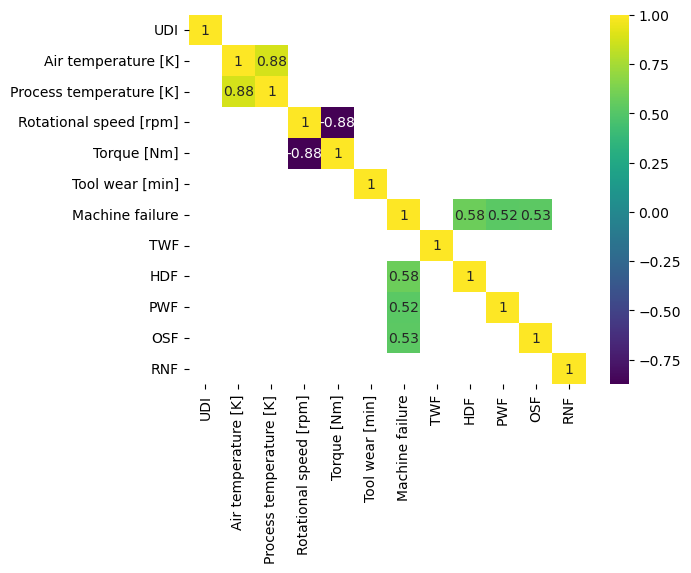

In [13]:
mask = dataset.corr().where((abs(dataset.corr()) >= 0.5)).isna()
sns.heatmap(dataset.corr(),annot=True,cmap='viridis',mask=mask)

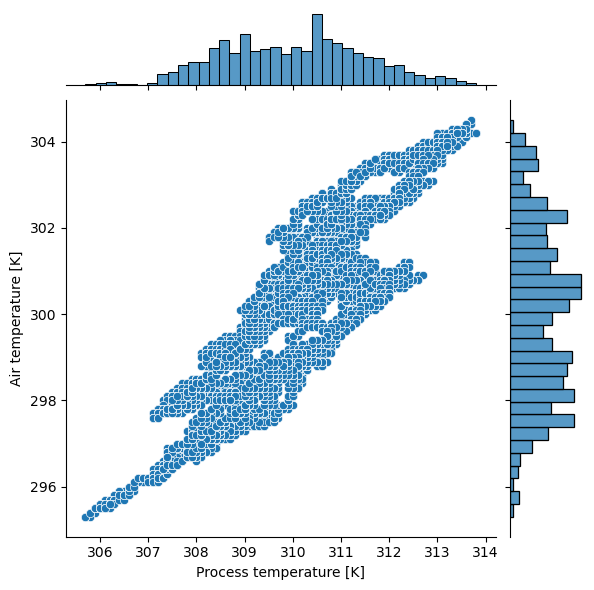

In [14]:
sns.jointplot(dataset,x='Process temperature [K]', y = 'Air temperature [K]')

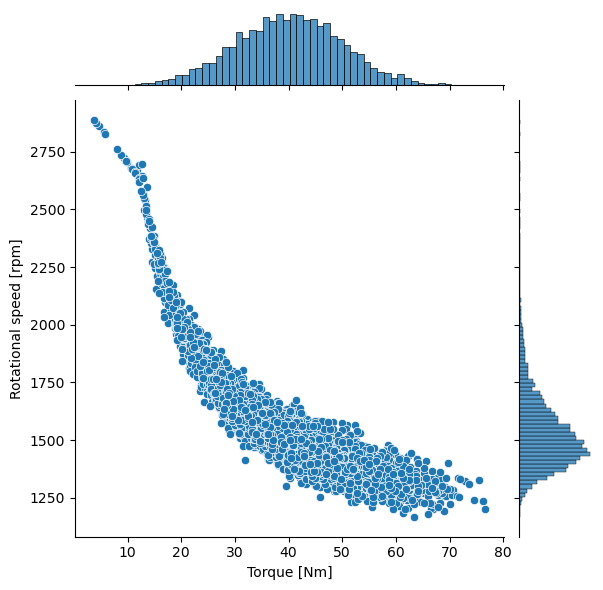

In [15]:
sns.jointplot(dataset,x='Torque [Nm]',y='Rotational speed [rpm]')

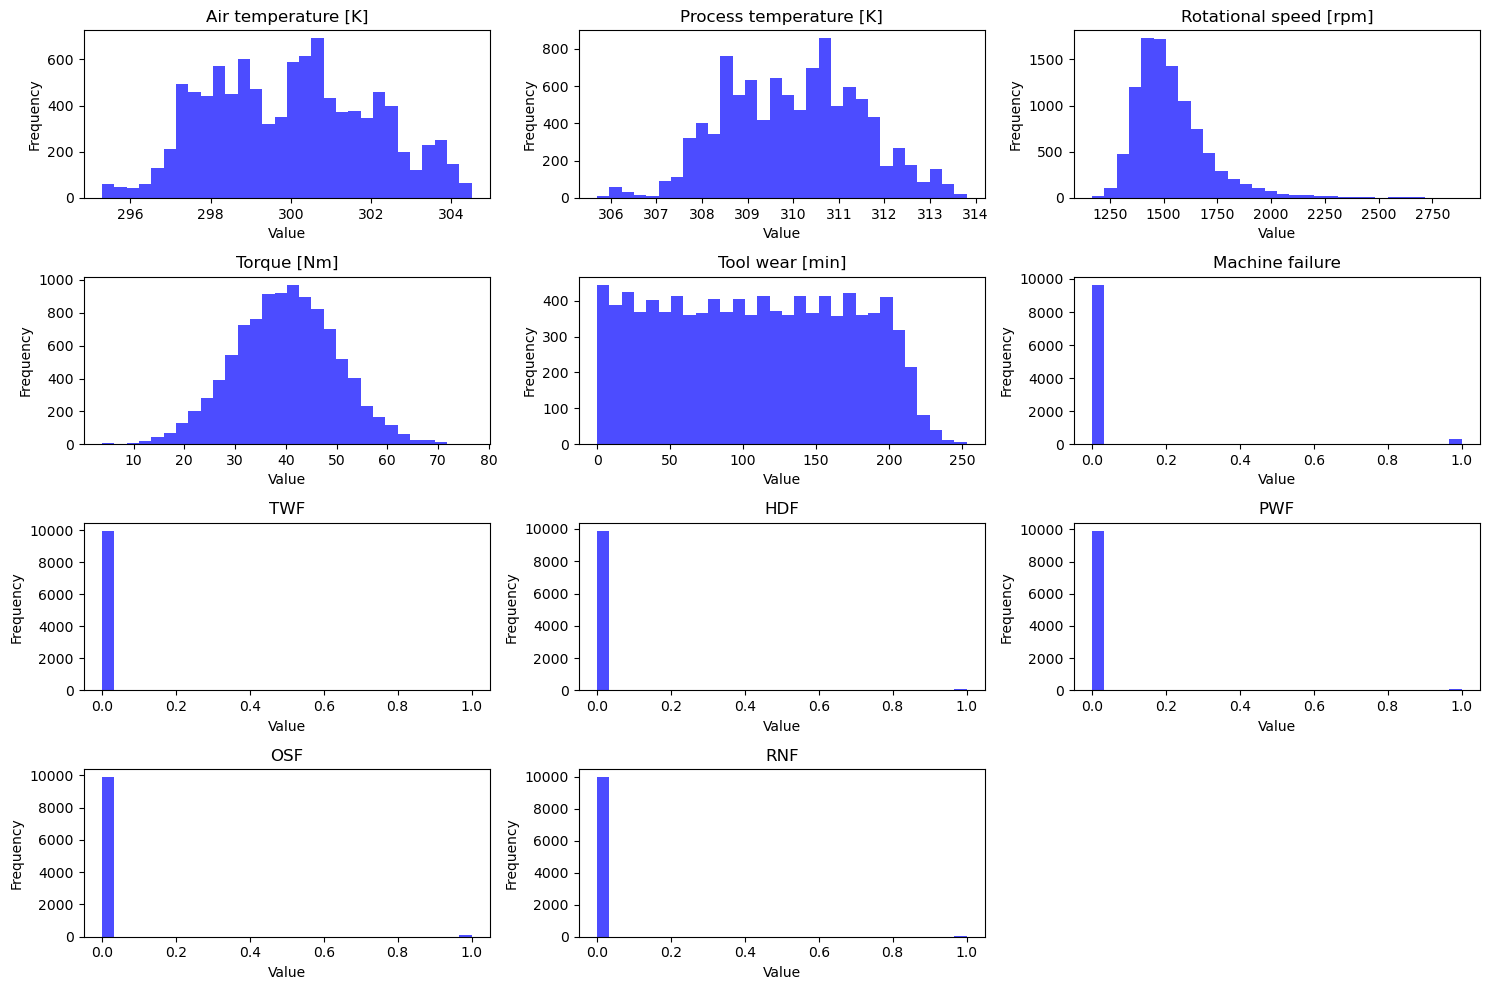

In [16]:
numeric_columns = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Machine failure',
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]


num_cols = 3 
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), tight_layout=True)

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    axes[i].hist(dataset[column], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()


In [17]:
dataset.drop(['UDI','Product ID'],axis=1,inplace=True)

In [18]:
# lets just fit failures without specifying its type

dataset.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

<Axes: >

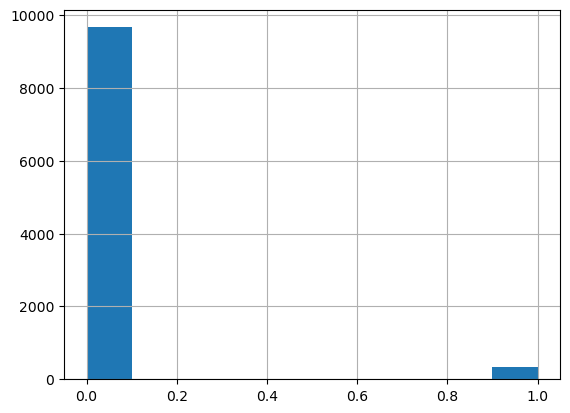

In [19]:
dataset['Machine failure'].hist() # extremly unbalanced

<Axes: >

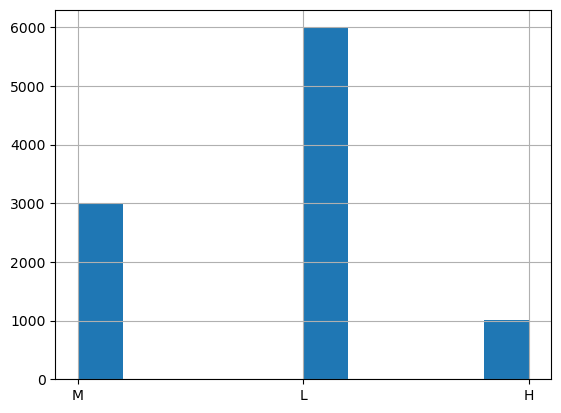

In [20]:
dataset['Type'].hist() # there is to many L type compare to the rest

In [21]:
# lets drop it as well and see how it goes
dataset.drop('Type',axis=1,inplace=True)

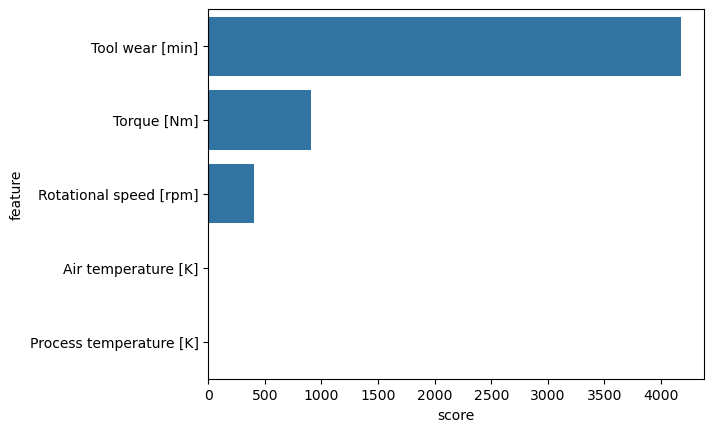

In [22]:
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
fit = best_features.fit(X,y)

scores=pd.DataFrame(fit.scores_)
col=pd.DataFrame(X.columns)

feature_score=pd.concat([col,scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=False,inplace=True)
sns.barplot(data=feature_score.head(),x ='score', y='feature')
plt.show()

In [23]:
X = dataset.copy()
y = X.pop('Machine failure')

In [24]:
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551.0,42.8,0.0
1,298.2,308.7,1408.0,46.3,3.0
2,298.1,308.5,1498.0,49.4,5.0
3,298.2,308.6,1433.0,39.5,7.0
4,298.2,308.7,1408.0,40.0,9.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,stratify=y)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [28]:
X_train_scaled.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,-0.843997,-0.738893,0.941869,-1.197772,-1.046153
1,-1.044697,-1.415070,-0.712479,0.455358,-0.368175
2,-0.492770,0.207756,2.177041,-1.558455,1.129682
3,-0.091369,-0.536040,1.232498,-1.408170,-0.715048
4,-0.994522,-0.874128,0.483570,-0.326121,1.602690


In [29]:
performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','time to train','time to predict','total time'])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
import time

knn_clf = KNeighborsClassifier()

start = time.time()
knn_clf.fit(X_train_scaled,y_train)
end_train = time.time()
predictions = knn_clf.predict(X_test_scaled)
end_predict = time.time()

from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             classification_report, recall_score, 
                             precision_score, f1_score, matthews_corrcoef, roc_auc_score, accuracy_score)
from sklearn import metrics

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1s = f1_score(y_test, predictions, average='weighted')
MCC = matthews_corrcoef(y_test, predictions)
ROC_AUC = roc_auc_score(y_test, knn_clf.predict_proba(X_test_scaled)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1s:.4f}")
print('=====================================================')
print(classification_report(y_test,predictions))

performance.loc['KNeighbors'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 0.9720
Precision: 0.9669
Recall: 0.9720
F1-Score: 0.9659
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1932
         1.0       0.73      0.28      0.40        68

    accuracy                           0.97      2000
   macro avg       0.85      0.64      0.69      2000
weighted avg       0.97      0.97      0.97      2000



C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


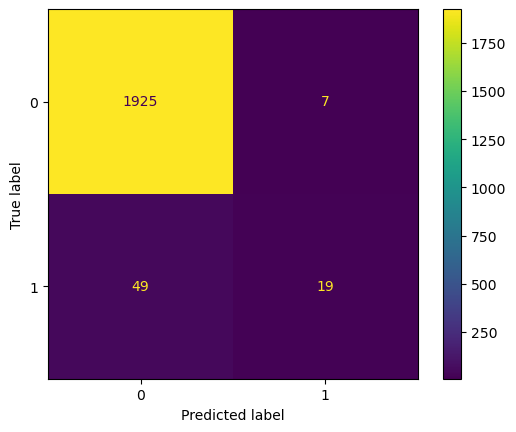

In [33]:
conf_matrix = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(conf_matrix, display_labels=None).plot()

In [59]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
start = time.time()
log_model.fit(X_train_scaled, y_train)
end_train = time.time()

predictions = log_model.predict(X_test_scaled)
end_predict = time.time()

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1s = f1_score(y_test, predictions, average='weighted')
MCC = matthews_corrcoef(y_test, predictions)
ROC_AUC = roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1s:.4f}")
print('=====================================================')
print(classification_report(y_test,predictions))

performance.loc['log_reg'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 0.9700
Precision: 0.9632
Recall: 0.9700
F1-Score: 0.9630
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1932
         1.0       0.67      0.24      0.35        68

    accuracy                           0.97      2000
   macro avg       0.82      0.62      0.67      2000
weighted avg       0.96      0.97      0.96      2000



C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


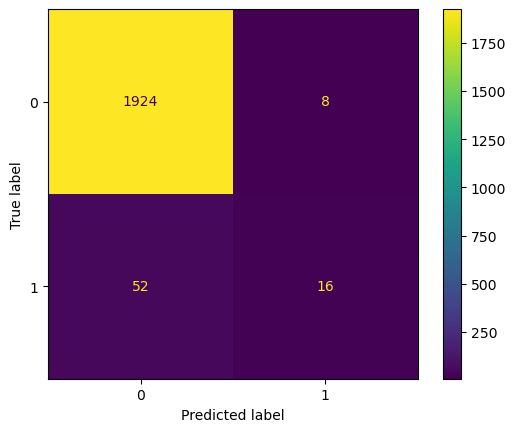

In [61]:
conf_matrix = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(conf_matrix, display_labels=None).plot()

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
start = time.time()
tree_model = DecisionTreeClassifier().fit(X_train_scaled,y_train)
end_train = time.time()
predictions = tree_model.predict(X_test_scaled)
end_predict = time.time()

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1s = f1_score(y_test, predictions, average='weighted')
MCC = matthews_corrcoef(y_test, predictions)
ROC_AUC = roc_auc_score(y_test, tree_model.predict_proba(X_test_scaled)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1s:.4f}")
print('=====================================================')
print(classification_report(y_test,predictions))

performance.loc['DecisionTree'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 0.9755
Precision: 0.9757
Recall: 0.9755
F1-Score: 0.9756
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1932
         1.0       0.64      0.65      0.64        68

    accuracy                           0.98      2000
   macro avg       0.81      0.82      0.81      2000
weighted avg       0.98      0.98      0.98      2000



C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


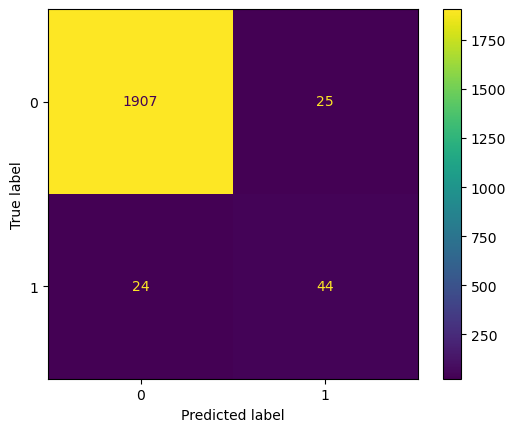

In [66]:
conf_matrix = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(conf_matrix, display_labels=None).plot()

In [68]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
forest_model = RandomForestClassifier(n_estimators = 100,
                                      n_jobs=-1,
                                      random_state=0,
                                      bootstrap=True,).fit(X_train_scaled,y_train)
end_train = time.time()

predictions = forest_model.predict(X_test_scaled)
end_predict = time.time()

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1s = f1_score(y_test, predictions, average='weighted')
MCC = matthews_corrcoef(y_test, predictions)
ROC_AUC = roc_auc_score(y_test, forest_model.predict_proba(X_test_scaled)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1s:.4f}")
print('=====================================================')
print(classification_report(y_test,predictions))

performance.loc['RandomForest'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 0.9805
Precision: 0.9787
Recall: 0.9805
F1-Score: 0.9788
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1932
         1.0       0.81      0.56      0.66        68

    accuracy                           0.98      2000
   macro avg       0.90      0.78      0.83      2000
weighted avg       0.98      0.98      0.98      2000



C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
boost_model = GradientBoostingClassifier().fit(X_train_scaled,y_train)
end_train = time.time()
predictions = boost_model.predict(X_test_scaled)
end_predict = time.time()

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1s = f1_score(y_test, predictions, average='weighted')
MCC = matthews_corrcoef(y_test, predictions)
ROC_AUC = roc_auc_score(y_test, boost_model.predict_proba(X_test_scaled)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1s:.4f}")
print('=====================================================')
print(classification_report(y_test,predictions))

performance.loc['GradientBoost'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 0.9790
Precision: 0.9769
Recall: 0.9790
F1-Score: 0.9772
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1932
         1.0       0.77      0.54      0.64        68

    accuracy                           0.98      2000
   macro avg       0.88      0.77      0.81      2000
weighted avg       0.98      0.98      0.98      2000



C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


<Axes: >

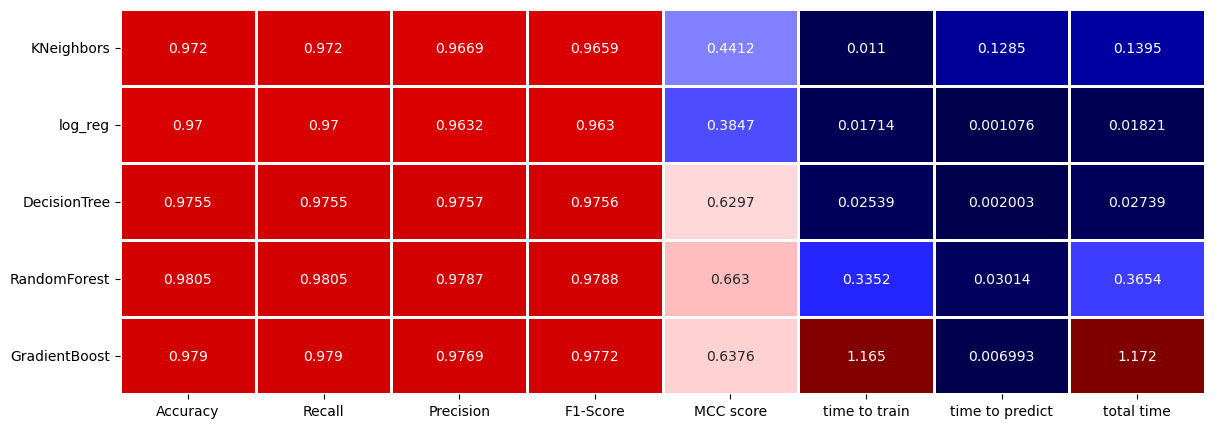

In [100]:
plt.figure(figsize=(14,5))
sns.heatmap(performance, annot=True, cmap='seismic',linewidths=2,cbar=False,fmt='.4g')

In [104]:
performance.fillna(.90,inplace=True)
performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,time to train,time to predict,total time
KNeighbors,97.20%,97.20%,96.69%,96.59%,44.12%,0.0,0.1,0.1
log_reg,97.00%,97.00%,96.32%,96.30%,38.47%,0.0,0.0,0.0
DecisionTree,97.55%,97.55%,97.57%,97.56%,62.97%,0.0,0.0,0.0
RandomForest,98.05%,98.05%,97.87%,97.88%,66.30%,0.3,0.0,0.4
GradientBoost,97.90%,97.90%,97.69%,97.72%,63.76%,1.2,0.0,1.2


## Model Performance Evaluation

The following metrics describe the performance of a binary classification model where the target class (1) is highly imbalanced (95% of the data belongs to class 0, and 5% belongs to class 1).

    Results:
- **Accuracy**: 0.9850
- **Precision**: 0.9130
- **Recall**: 0.6176
- **F1-Score**: 0.7368
---
    Metric Explanations:

1. Accuracy (0.9850)
- In this case, accuracy is high because the dataset is imbalanced, and the model correctly predicts most class 0 instances. However, **accuracy is not a good indicator** when dealing with imbalanced data.

2. Precision (0.9130)
- A precision of 0.9130 means that **91.3% of the time**, when the model predicts class 1, it is correct.
- This shows that **false positives** (predicting class 1 when it’s actually class 0) are relatively low.

3. Recall (0.6176)
- A recall of 0.6176 means that the model is only capturing **61.76% of actual class 1 instances**.
- The **model is missing a significant portion of class 1 instances** (false negatives), which is typical in imbalanced datasets.

4. F1-Score (0.7368)
- An F1-score of 0.7368 reflects a trade-off: the model is fairly good at predicting class 1, but it still misses several true positives.

---

    Macro and Weighted Averages:

- **Macro average**: Takes the unweighted mean of precision, recall, and F1-score across both classes. It shows that recall for the minority class (1) is much lower.
- **Weighted average**: Weighs the metrics by the number of instances in each class. Due to class imbalance, the weighted average is close to the performance of the majority class (0), leading to a high overall score.

---

    Conclusions:

- The model achieves **high accuracy** due to the dominance of class 0.
- **Precision for class 1 is high**, meaning that when the model predicts class 1, it is mostly correct.
- **Recall for class 1 is lower**, indicating that the model misses many actual instances of class 1.
- The **F1-score** balances precision and recall, but further improvements in recall are needed.

In [109]:
from imblearn.over_sampling import SMOTE

In [111]:
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [113]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
forest_model = RandomForestClassifier(n_estimators = 100,
                                      n_jobs=-1,
                                      random_state=0,
                                      bootstrap=True,).fit(X_train_balanced,y_train_balanced)
end_train = time.time()

predictions = forest_model.predict(X_test_scaled)
end_predict = time.time()

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1s = f1_score(y_test, predictions, average='weighted')
MCC = matthews_corrcoef(y_test, predictions)
ROC_AUC = roc_auc_score(y_test, forest_model.predict_proba(X_test_scaled)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1s:.4f}")
print('=====================================================')
print(classification_report(y_test,predictions))

C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9705
Precision: 0.9751
Recall: 0.9705
F1-Score: 0.9724
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1932
         1.0       0.55      0.72      0.62        68

    accuracy                           0.97      2000
   macro avg       0.77      0.85      0.80      2000
weighted avg       0.98      0.97      0.97      2000



### Key Takeaways:
Improved Recall for Class 1: The recall for class 1 has improved from 0.6176 to 0.72 after applying SMOTE, meaning the model is now identifying more instances of the minority class. This was the main goal of using SMOTE, so the result is promising.

Lower Precision for Class 1: Precision for class 1 is relatively low at 0.55. This suggests that while the model is predicting more class 1 instances (thanks to SMOTE), some of these predictions are incorrect, leading to more false positives (class 0 being predicted as class 1).

Trade-off between Precision and Recall: As is often the case with imbalanced datasets, improving recall (capturing more minority class instances) comes at the cost of precision (more false positives). The increase in recall shows that SMOTE is helping the model detect more class 1 instances, but precision needs to be improved further.

In [122]:
start = time.time()
forest_model = RandomForestClassifier(n_estimators = 100,
                                      n_jobs=-1,
                                      random_state=0,
                                      bootstrap=True,).fit(X_train_balanced,y_train_balanced)
end_train = time.time()

predictions = forest_model.predict(X_test_scaled)
end_predict = time.time()

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1s = f1_score(y_test, predictions, average='weighted')
MCC = matthews_corrcoef(y_test, predictions)
threshold = 0.3

# Assign class 1 if the probability is above the threshold, otherwise class 0
y_pred_custom = (forest_model.predict_proba(X_test_scaled)[:,1] >= threshold).astype(int)
ROC_AUC = roc_auc_score(y_test, forest_model.predict_proba(X_test_scaled)[:,1], average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1s:.4f}")
print(f"ROC_AUC: {ROC_AUC:.4f}")
print('=====================================================')
print(classification_report(y_test,predictions))

C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9705
Precision: 0.9751
Recall: 0.9705
F1-Score: 0.9724
ROC_AUC: 0.9527
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1932
         1.0       0.55      0.72      0.62        68

    accuracy                           0.97      2000
   macro avg       0.77      0.85      0.80      2000
weighted avg       0.98      0.97      0.97      2000



C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


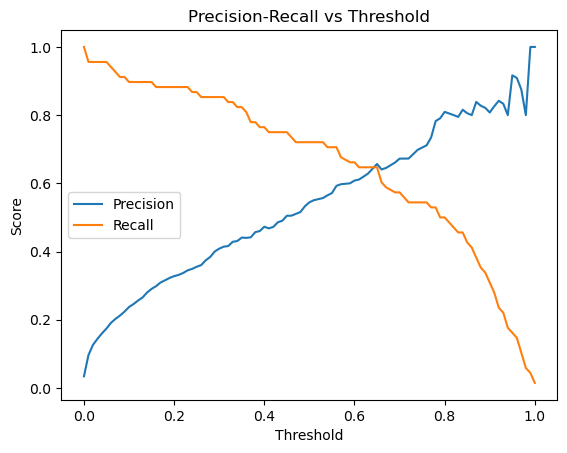

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, forest_model.predict_proba(X_test_scaled)[:,1])

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.show()

In [144]:

y_pred_recall = (forest_model.predict_proba(X_test_scaled)[:,1] >= 0.64).astype(int)

print(classification_report(y_test, y_pred_recall))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1932
         1.0       0.66      0.65      0.65        68

    accuracy                           0.98      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.98      0.98      0.98      2000



C:\Users\druzh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


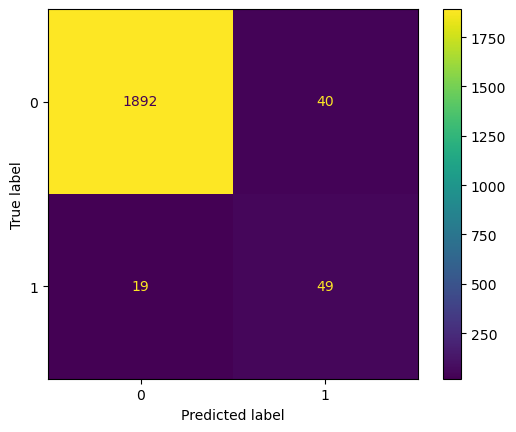

In [146]:
conf_matrix = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(conf_matrix, display_labels=None).plot()

In [150]:
import keras
from keras import layers
from keras.models import Sequential
from keras import optimizers

In [155]:
X_train_scaled.shape

(8000, 5)

In [224]:
model_1 = Sequential([
    layers.Dense(1000, activation='relu',input_shape=(5,)),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])

model_1.compile(optimizer= 'adam', loss='binary_crossentropy', metrics='accuracy')

from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_accuracy', patience=5, verbose=0, restore_best_weights=True)

history = model_1.fit(X_train_scaled,y_train,epochs=100,verbose=1,batch_size=32,validation_split=0.2,callbacks=callback)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1542 - accuracy: 0.9638 - val_loss: 0.1193 - val_accuracy: 0.9588
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.0940 - accuracy: 0.9680 - val_loss: 0.1049 - val_accuracy: 0.9588
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9680 - val_loss: 0.0940 - val_accuracy: 0.9588
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.0797 - accuracy: 0.9680 - val_loss: 0.0931 - val_accuracy: 0.9588
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.0749 - accuracy: 0.9680 - val_loss: 0.0928 - val_accuracy: 0.9588
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.0776 - accuracy: 0.9680 - val_loss: 0.0771 - val_accuracy: 0.9669
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9725 - val_loss: 0.0782 - val_accuracy: 0.9694

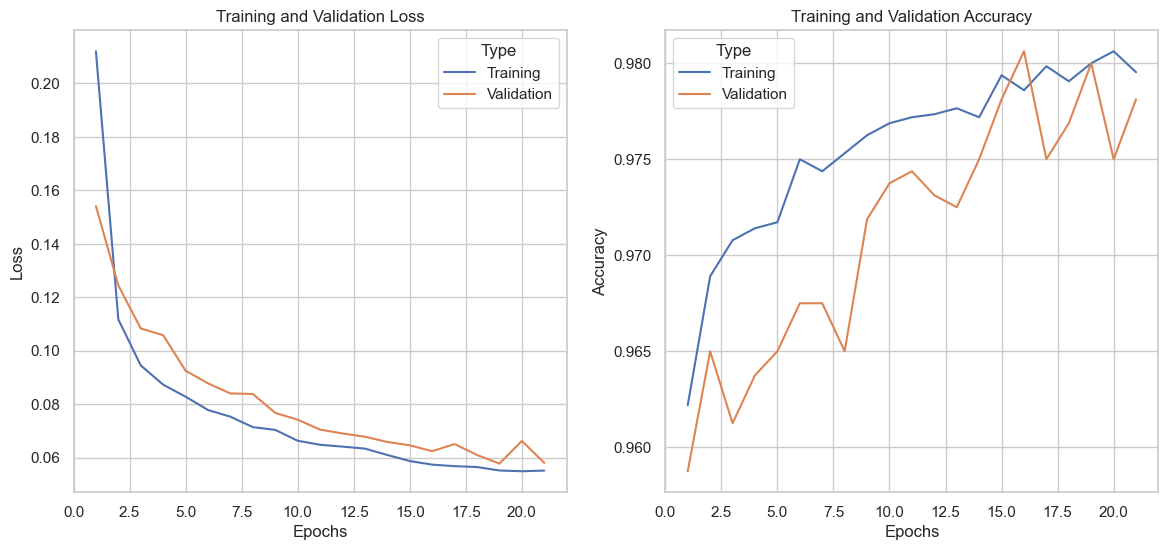

In [212]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

history_df = pd.DataFrame({
    'Epoch': list(epochs) * 2,
    'Loss': train_loss + val_loss,
    'Accuracy': train_acc + val_acc,
    'Type': ['Training'] * len(epochs) + ['Validation'] * len(epochs)
})

sns.set(style='whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


sns.lineplot(x='Epoch', y='Loss', hue='Type', data=history_df, ax=ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')


sns.lineplot(x='Epoch', y='Accuracy', hue='Type', data=history_df, ax=ax[1])
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.show()

In [214]:
results = model_1.evaluate(X_test_scaled,y_test)
print(f"Accuracy test: {results[1]:.3f}")

63/63 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9750
Accuracy test: 0.975


In [298]:
from sklearn.utils.class_weight import compute_class_weight

model_1 = Sequential([
    layers.Dense(64, activation='relu',input_shape=(5,)),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.05),
    layers.Dense(1, activation='sigmoid')
])

model_1.compile(optimizer= optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics='accuracy')

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

history = model_1.fit(X_train_scaled, 
                      y_train, 
                      epochs=50, 
                      batch_size=32, 
                      validation_split=0.2, 
                      class_weight=class_weight_dict, 
                      callbacks=callback)

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.4627 - accuracy: 0.7859 - val_loss: 0.5306 - val_accuracy: 0.7206
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3150 - accuracy: 0.8375 - val_loss: 0.3063 - val_accuracy: 0.8444
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3059 - accuracy: 0.8514 - val_loss: 0.3172 - val_accuracy: 0.8494
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.2716 - accuracy: 0.8631 - val_loss: 0.2652 - val_accuracy: 0.8625
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2789 - accuracy: 0.8711 - val_loss: 0.1536 - val_accuracy: 0.9450
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2596 - accuracy: 0.8753 - val_loss: 0.2409 - val_accuracy: 0.8975
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2447 - accuracy: 0.8900 - val_loss: 0.1890 - val_accuracy: 0.9237
Epoch 

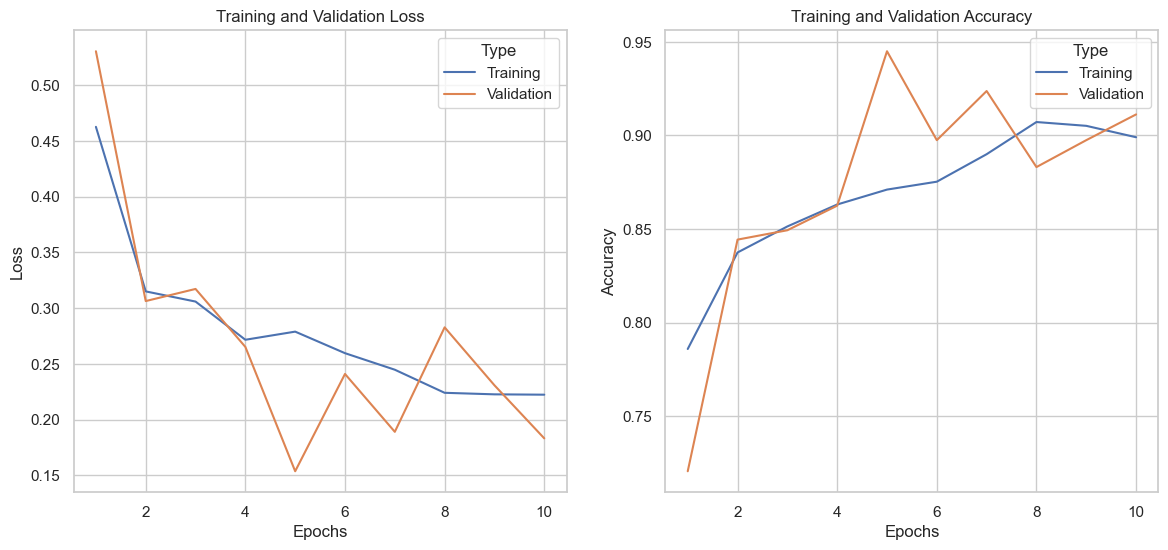

In [300]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

history_df = pd.DataFrame({
    'Epoch': list(epochs) * 2,
    'Loss': train_loss + val_loss,
    'Accuracy': train_acc + val_acc,
    'Type': ['Training'] * len(epochs) + ['Validation'] * len(epochs)
})

sns.set(style='whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


sns.lineplot(x='Epoch', y='Loss', hue='Type', data=history_df, ax=ax[0])
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')


sns.lineplot(x='Epoch', y='Accuracy', hue='Type', data=history_df, ax=ax[1])
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.show()

In [302]:
results = model_1.evaluate(X_test_scaled,y_test)
print(f"Accuracy test: {results[1]:.3f}")

63/63 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9435
Accuracy test: 0.943


In [322]:
y_pred = (model_1.predict(X_test_scaled) > 0.1).astype(int)
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86      1932
         1.0       0.12      0.94      0.21        68

    accuracy                           0.76      2000
   macro avg       0.56      0.85      0.54      2000
weighted avg       0.97      0.76      0.84      2000



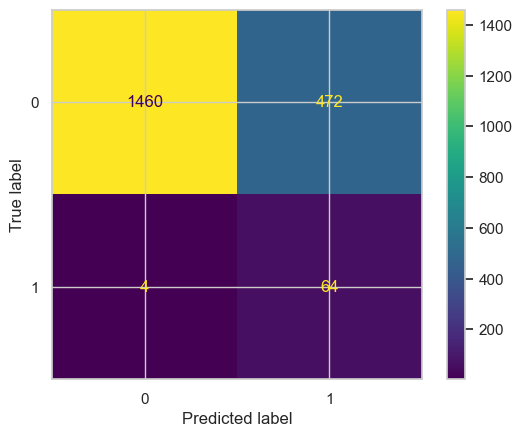

In [324]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=None).plot()